In [99]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Import the pandas library to read our dataset 
import pandas as pd
# Get the train/test split package from sklearn for preparing our dataset to # train and test the model with 
from sklearn.model_selection import train_test_split
# Import the numpy library to work with and manipulate the data 
# Get the train/test split package from sklearn for preparing our dataset to
# train and test the model with
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

import nltk 
import random 
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
nltk.download('stopwords') 
#nltk.download('movie_reviews') 
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:
# Imported the necessary libraries
import csv
import urllib.request as urllib2

import matplotlib.pyplot as plt
from nltk import FreqDist
import pandas as pd
# Importing data using url
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
response = urllib2.urlopen(url)

# reading data using pandas and converting into dataframe
df = pd.read_csv(response,delimiter='\t',encoding='utf-8')
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [101]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,55173,2751,with moments out of an Alice,2
1,149287,8123,would n't work without all those gimmicks,2
2,103889,5479,"of great power , yet some members of the audience",2
3,60530,3056,does n't quite do justice to the awfulness of ...,0
4,100422,5269,smartly and,3


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(df ['Phrase'], df ['Sentiment'], test_size=0.3, random_state=2003)
documents=[]
X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())


for i in range(len(X_train)):
  documents.append([list(word_tokenize(X_train[i])), Y_train[i]]) 

X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(word_tokenize(X_test[i])), Y_test[i]]) 

documents[0]

[['with', 'a', 'momentum', 'that', 'never', 'lets', 'up'], 4]

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
porter = PorterStemmer() 
lancaster=LancasterStemmer() 
wordnet_lemmatizer = WordNetLemmatizer() 
stopwords_en = stopwords.words("english") 
punctuations="?:!.,;'\"-()"
#parameters to adjust to see the impact on outcome 
remove_stopwords = True
useStemming = False
useLemma = False
removePuncs = True


In [104]:
for l in range(len(documents)):                   #For each review document 
  label = documents[l][1]                         #Save review label 
  tmpReview = []                                  #Placeholder list for new review 
  for w in documents[l][0]:                       #For each word this is review 
    newWord = w                                   #Set newWork to be the updated word 
    if remove_stopwords and (w in stopwords_en):  #if the word is a stopword & we want to remove stopwords 
      continue                                    #skip the word and don’t had it to the normalized review 
    if removePuncs and (w in punctuations):       #if the word is a punc. & we want to remove punctuations 
      continue                                    #skip the word and don’t had it to the normalized review 
    if useStemming:
      #if useStemming is set to True 
      #Keep one stemmer commented out 
      #newWord = porter.stem(newWord) #User porter stemmer 
      newWord = lancaster.stem(newWord) #Use Lancaster stemmer 
    if useLemma: 
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    tmpReview.append(newWord)                     #Add normalized word to the tmp review 
  documents[l] = (tmpReview, label)             #Update the reviews list with clean review 
  documents[l] = (' '.join(tmpReview), label) 

print(documents[0])

('momentum never lets', 4)


In [105]:
df = pd.DataFrame(documents, columns=['text', 'sentiment']) 
df.head()



,text,sentiment
0,momentum never lets,4
1,destined 21st Century 's new `` Conan '' 's go...,3
2,As remake,2
3,music business 21st Century,2
4,Everything right Blade,3


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],  df['sentiment'], test_size=0.3, random_state=2003)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical

vectorizer = TfidfVectorizer(max_features = 2500)#,ngram_range=(2, 2)) 
X = vectorizer.fit_transform(df["text"]) 
Y = df['sentiment'] 
 
X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test


In [108]:
Y_test

13510     2
61932     1
82549     2
137718    2
121990    2
         ..
94224     2
135456    2
154729    2
23031     3
57870     3
Name: sentiment, Length: 46818, dtype: int64

In [0]:
# Converts the datasets to numpy arrays to work with our PyTorch model 
# X_train = np.array(X_train)
# X_train = X_train.toarray() 
# Y_train = np.array(Y_train)

# Convert the testing data 
# X_test = X_test.toarray() 
# Y_test = np.array(Y_test)
# print(x_train_np.shape)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

In [0]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [0]:
batch_size = 64
num_classes = 5
epochs = 50

In [113]:
X_train.shape
# Y_train = to_categorical(Y_train,5)
# y_test = to_categorical(y_test,5)

(109242, 2500)

In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [115]:
Y_test

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [0]:

from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential


In [0]:

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5,
                 activation='relu',
                 input_shape=(2500,1)))
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(rate = 0.50))
model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Epoch 1/50
109242/109242 [==============================] - 25s 230us/step - loss: 1.1972 - acc: 0.5364 - f1_m: 0.3997 - precision_m: 0.5298 - recall_m: 0.3410
Epoch 2/50
109242/109242 [==============================] - 25s 225us/step - loss: 1.0332 - acc: 0.5960 - f1_m: 0.5482 - precision_m: 0.6636 - recall_m: 0.4685
Epoch 3/50
109242/109242 [==============================] - 25s 226us/step - loss: 0.9992 - acc: 0.6073 - f1_m: 0.5660 - precision_m: 0.6705 - recall_m: 0.4905
Epoch 4/50
109242/109242 [==============================] - 25s 224us/step - loss: 0.9860 - acc: 0.6129 - f1_m: 0.5741 - precision_m: 0.6752 - recall_m: 0.4999
Epoch 5/50
109242/109242 [==============================] - 24s 224us/step - loss: 0.9786 - acc: 0.6142 - f1_m: 0.5765 - precision_m: 0.6749 - recall_m: 0.5037
Epoch 6/50
109242/109242 [==============================] - 24s 224us/step - loss: 0.9730 - acc: 0.6157 - f1_m: 0.5779 - precision_m: 0.6770 - recall_m: 0.5047
Epoch 7/50
109242/109242 [==============

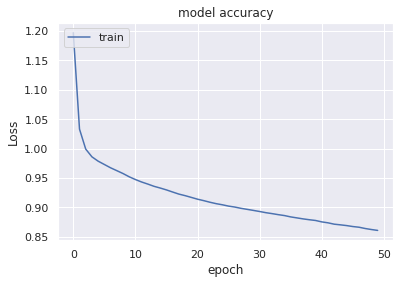

Test loss: 1.0148107373448112
Test accuracy: 0.6126276218548422
Precision: 0.6527347816060867
F1 measure: 0.5869592810167018
Recall: 0.5347943098808151


In [120]:
import time


history=model.fit(X_train, Y_train,
          batch_size=256,
          epochs=50)

plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Precision:', score[3])
print('F1 measure:', score[2])
print('Recall:', score[4])


In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model.save('/content/drive/My Drive/1111102.h5')